In [1]:
import pandas as pd
import numpy as np
import sys
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew


In [2]:
##setup google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
##setup path
root_path = '/content/drive/MyDrive/W210 - Capstone Project/data'

In [4]:
##import dataset
df_census = pd.read_csv('/content/drive/MyDrive/W210 - Capstone Project/data/relabeled_census.csv', encoding = "ISO-8859-1")
df_broadband = pd.read_csv('/content/drive/MyDrive/W210 - Capstone Project/data/merged_broadband.csv', encoding = 'ISO-8859-1')

# Broadband Data



In [5]:
df_broadband.head()

,Unnamed: 0,Zip,Population,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps,%Access to Terrestrial Broadband,Lowest Priced Terrestrial Broadband Plan,WiredCount_2015,Fwcount_2015,AllProviderCount_2015,Wired25_3_2015,Wired100_3_2015,All25_3_2015,All100_3.1,Total_Enrolled_Households,ST,COUNTY NAME,COUNTY ID,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
0,0,29639,1742.0,3.0,0.0,8.0,3.0,3.0,5.0,3.0,163.0,93.12,223.75,90%,40.0,3.0,0.0,5.0,3.0,3.0,3.0,3.0,21.0,SC,Abbeville,45001,0.948,0.034,0.110,0.002
1,1,29620,12934.0,6.0,0.0,11.0,5.0,3.0,7.0,3.0,2536.0,212.50,536.35,98%,40.0,6.0,0.0,8.0,3.0,3.0,3.0,3.0,542.0,SC,Abbeville,45001,0.398,0.002,0.007,0.000
2,2,29659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC,Abbeville,45001,0.206,0.152,0.608,0.043
3,3,29638,2944.0,6.0,1.0,13.0,4.0,4.0,6.0,4.0,272.0,82.79,222.35,95%,40.0,5.0,0.0,7.0,2.0,2.0,2.0,2.0,68.0,SC,Abbeville,45001,0.369,0.010,0.031,-0.001
4,4,29628,2759.0,4.0,0.0,8.0,3.0,2.0,5.0,2.0,100.0,51.12,126.06,95%,40.0,4.0,0.0,6.0,3.0,3.0,3.0,3.0,102.0,SC,Abbeville,45001,0.221,0.014,0.043,0.000


## EDA - Outliers Exploration


### 1.Broadband Merged Datasets

In [7]:
numeric_feats = df_broadband.dtypes[df_broadband.dtypes != "object"].index
numeric_feats

Index(['Unnamed: 0', 'Zip', 'Population', 'WiredCount_2020', 'Fwcount_2020',
       'AllProviderCount_2020', 'Wired25_3_2020', 'Wired100_3_2020',
       'All25_3_2020', 'All100_3', 'TestCount', 'AverageMbps',
       'FastestAverageMbps', 'Lowest Priced Terrestrial Broadband Plan',
       'WiredCount_2015', 'Fwcount_2015', 'AllProviderCount_2015',
       'Wired25_3_2015', 'Wired100_3_2015', 'All25_3_2015', 'All100_3.1',
       'Total_Enrolled_Households', 'COUNTY ID', 'BROADBAND USAGE',
       'ERROR RANGE (MAE)(+/-)', 'ERROR RANGE (95%)(+/-)', 'MSD'],
      dtype='object')

In [39]:
# define plot function, and in this function, we will calculate the skew of X and take the log1p of y
def plot_outlier(x,y):
    tmp=x.dropna()
    skew_value=skew(tmp)
    y=np.log1p(y)
    print('sample lengh: %s   and skew: %s'%(len(x),skew_value))
    fig,axs=plt.subplots(1,2,figsize=(15,6))
    sns.boxplot(x,orient='v',ax=axs[0])
    sns.regplot(x,y,ax=axs[1])
    plt.tight_layout()

### 1.1 Broadband Usage

sample lengh: 32735   and skew: 0.7189562961895808


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


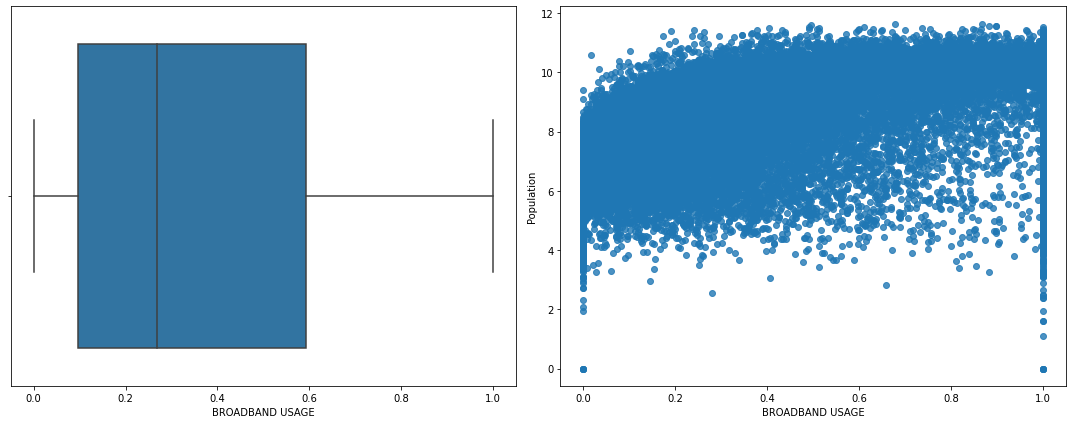

In [47]:
# Broadband Usage (0-100%)
plot_outlier(df_broadband['BROADBAND USAGE'],df_broadband['Population'])
## Looks like there's no obvious outliers for the broadband usage data
##let's look at the population and broadband usage relationship

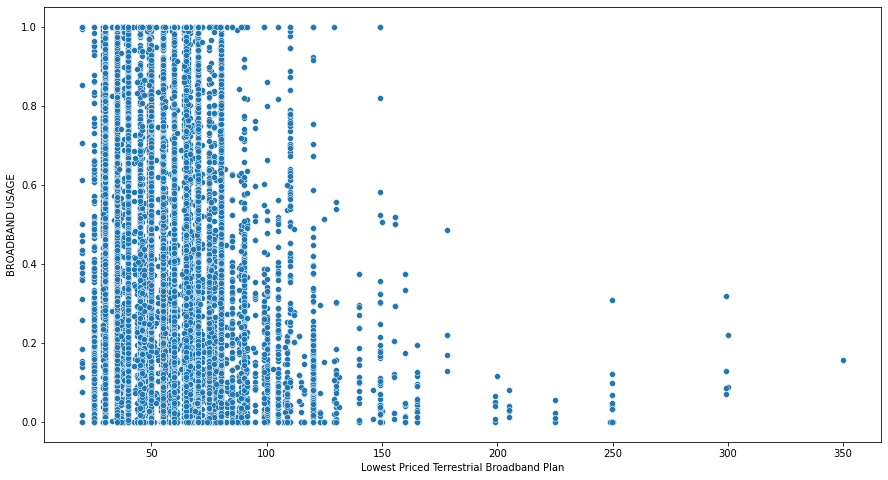

In [65]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=df_broadband, x="Lowest Priced Terrestrial Broadband Plan", y="BROADBAND USAGE")

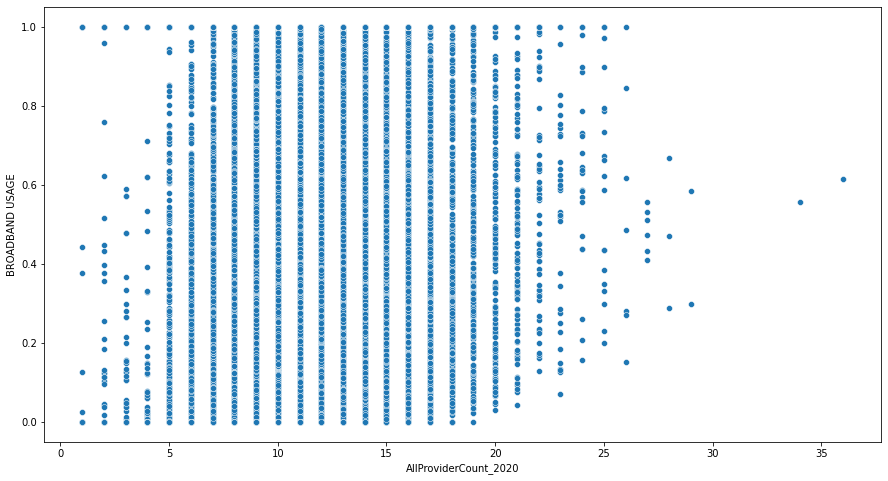

In [67]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=df_broadband, x="AllProviderCount_2020", y="BROADBAND USAGE")

### 1.2 Overview of Provider data in 2020 & 2015

* **WiredCount_2020**: Number of Wired (Cable, Copper, DSL, Fiber) Providers present in a zip code in 2020
* **Fwcount_2020**: Number of Fixed Wireless Providers (WISPs) present in a zip code in 2020
* **AllProviderCount_2020**:	Number of Providers of any technology present in a zip code in 2020
* **Wired25_3_2020**:	Number of Wired (Cable, Copper, DSL, Fiber) Providers present in a zip code offering speeds of at least 25 Mbps Download / 3 Mbps Upload in 2020
* **Wired100_3_2020**:	Number of Wired (Cable, Copper, DSL, Fiber) Providers present in a zip code offering speeds of at least 100 Mbps Download / 3 Mbps Upload in 2020
* **All25_3_2020**:	Number of Providers (any technology) present in a zip code offering speeds of at least 25 Mbps Download / 3 Mbps Upload
* **All100_3**:	Number of Providers (any technology) present in a zip code offering speeds of at least 100 Mbps Download / 3 Mbps Upload

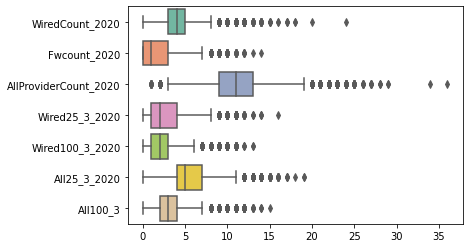

In [45]:
df_2 = df_broadband[['WiredCount_2020', 'Fwcount_2020',
       'AllProviderCount_2020', 'Wired25_3_2020', 'Wired100_3_2020',
       'All25_3_2020', 'All100_3' ]]


ax = sns.boxplot(data=df_2, orient="h", palette="Set2")


The graph above is quite interesting, there a few observations:
1. In general, the data is making sense because the all providers data is about the sum of Wired and Fixed Wireless providers
2. We can see that across the variables, there are "outliers", it can be some zip codes have a large set of providers, or maybe these outliers are just false coding of data.

Before we dive deep into each invidual variable, let's take a look at 2015 data for similar variables.



#### Overview of Provider data in 2015

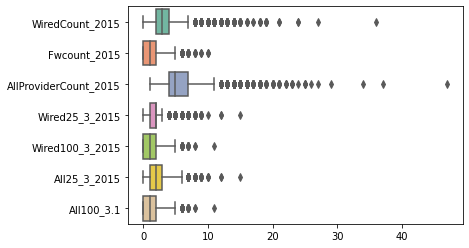

In [46]:
df_3 = df_broadband[['WiredCount_2015', 'Fwcount_2015', 'AllProviderCount_2015',
       'Wired25_3_2015', 'Wired100_3_2015', 'All25_3_2015', 'All100_3.1' ]]


ax = sns.boxplot(data=df_3, orient="h", palette="Set2")

In general, we can see that the number of providers are fewer compare to 2020. But we can also see that there a few cases where the number of providers are >40, even larger than 2020 providers number. This is very suspicious, it can be it is coded wrong.

#### Deep dive of Provider data in 2020

sample lengh: 32735   and skew: 0.6370705835526785


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


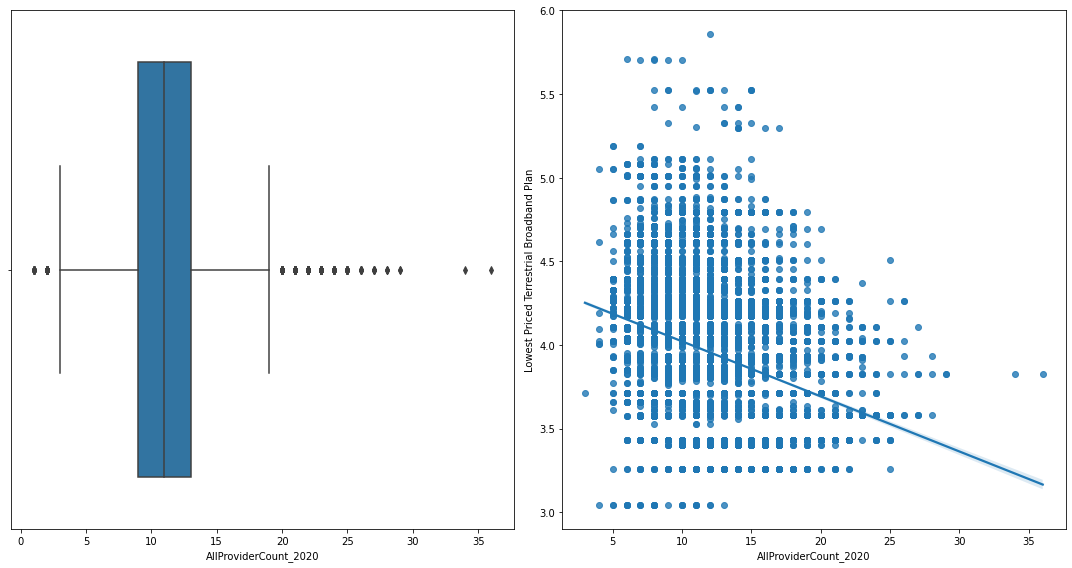

In [30]:

plot_outlier(df_broadband['AllProviderCount_2020'],df_broadband['Lowest Priced Terrestrial Broadband Plan'])
## it's hard to say that >20 providers are outliers
## from the right graph we can see that although it's hard to draw a negative correlation conclusion but overall with more providers the price is lower.


Look at relationship between wired count 2020 and fixed wireless count in 2020

sample lengh: 32735   and skew: 0.847047282929923


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


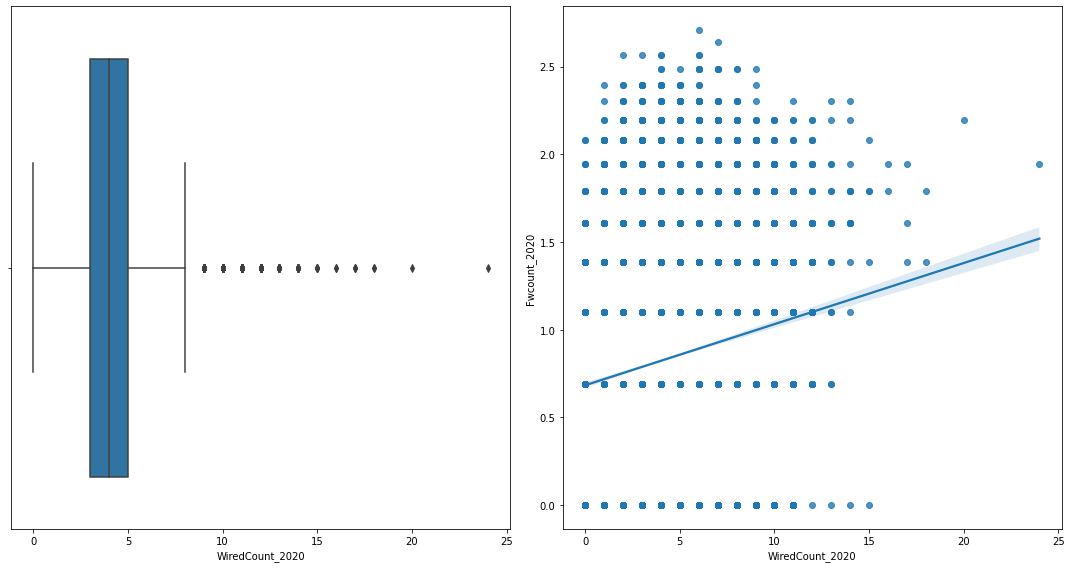

In [31]:
# WiredCount_2020: 	Number of Wired (Cable, Copper, DSL, Fiber) Providers present in a zip code in 2020
plot_outlier(df_broadband['WiredCount_2020'],df_broadband['Fwcount_2020'])
## it's hard to say that >8 providers are outliers, need to explore more
## from the right graph, we can see that the relationship between 
## "Number of Fixed Wireless Providers (WISPs) present in a zip code in 2020" and 
## "Number of Wired (Cable, Copper, DSL, Fiber) Providers present in a zip code in 2020" is not clear

Look at all providers count in 2020 vs. provider count in 2015

sample lengh: 32735   and skew: 1.8443602606971925


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


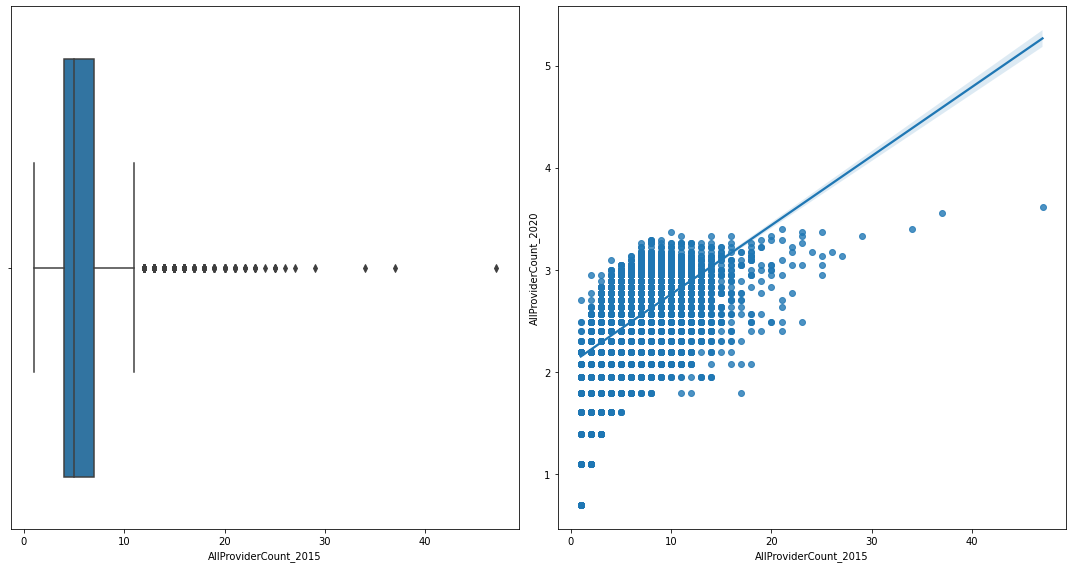

In [34]:
plot_outlier(df_broadband['AllProviderCount_2015'],df_broadband['AllProviderCount_2020'])


Look at wired count in 2020 vs. 2015

sample lengh: 32735   and skew: 2.075349621316419


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


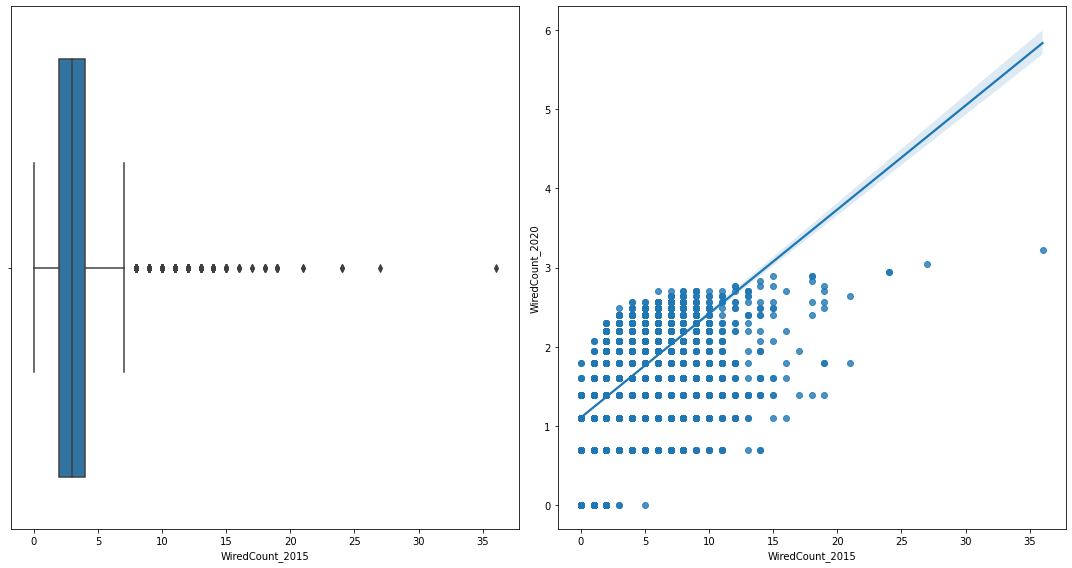

In [33]:
plot_outlier(df_broadband['WiredCount_2015'],df_broadband['WiredCount_2020'])

### 1.3 Speed Data


*   **AverageMbps**:	Average Download Speed via M-Lab Speed Tests, rolling 12 months
*   **FastestAverageMbps**:	Fastest Average (90th Percentile) Download Speed via M-Lab Speed Tests, rolling 12 months



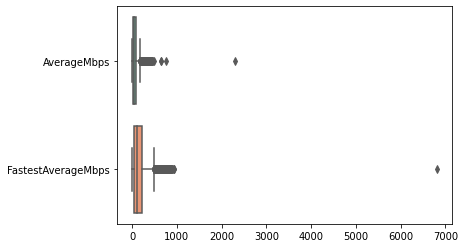

In [49]:
df_4 = df_broadband[['AverageMbps', 'FastestAverageMbps' ]]
ax = sns.boxplot(data=df_4, orient="h", palette="Set2")

## Just looking at the graph we can see that there might be some outliers here

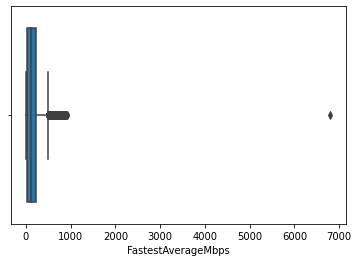

In [28]:
# Fastest Average (90th Percentile) Download Speed via M-Lab Speed Tests, rolling 12 months
sns.boxplot(x=df_broadband['FastestAverageMbps'])
## outliers in 7000 Mbps definitely doesn't make sense

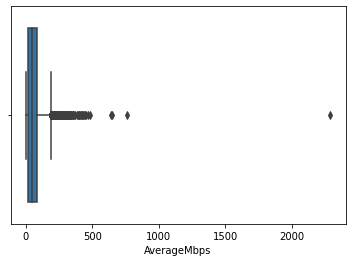

In [51]:
# AverageMbp
sns.boxplot(x=df_broadband['AverageMbps'])
## outliers in 2000+ Mbps doesn't make sense

In [64]:
df_broadband[df_broadband['AverageMbps']>1000]

,Unnamed: 0,Zip,Population,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps,%Access to Terrestrial Broadband,Lowest Priced Terrestrial Broadband Plan,WiredCount_2015,Fwcount_2015,AllProviderCount_2015,Wired25_3_2015,Wired100_3_2015,All25_3_2015,All100_3.1,Total_Enrolled_Households,ST,COUNTY NAME,COUNTY ID,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
21000,21000,10003,56024.0,8.0,3.0,16.0,6.0,5.0,10.0,7.0,292012.0,2289.33,6802.47,100%,39.99,6.0,0.0,7.0,5.0,4.0,5.0,4.0,634.0,NY,New York,36061,0.653,0.001,0.002,0.0


Umm....I am not sure, this one has a large population but both the average speed and fastest average speed just seem too high for me... Drop??

### 1.4 Price Data

**Lowest Priced Terrestrial Broadband Plan:** The Lowest Regular Monthly Priced Terrestrial (Wired + Fixed Wireless) Residential Standalone-Internet Broadband (25 Mbps Download / 3 Mbps Upload) Plan available in the zip


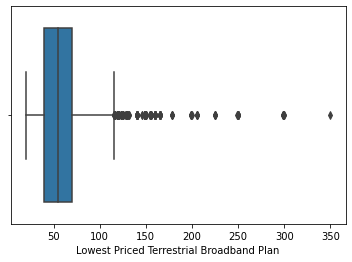

In [29]:
# The Lowest Regular Monthly Priced Terrestrial (Wired + Fixed Wireless) 
# Residential Standalone-Internet Broadband (25 Mbps Download / 3 Mbps Upload) Plan available in the zip

sns.boxplot(x=df_broadband['Lowest Priced Terrestrial Broadband Plan'])

## price >110 per month seems to be high, but cannot say that they are outliers, would be interesting to see if that correlates to the # of providers

sample lengh: 32735   and skew: 1.9858431572676412


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


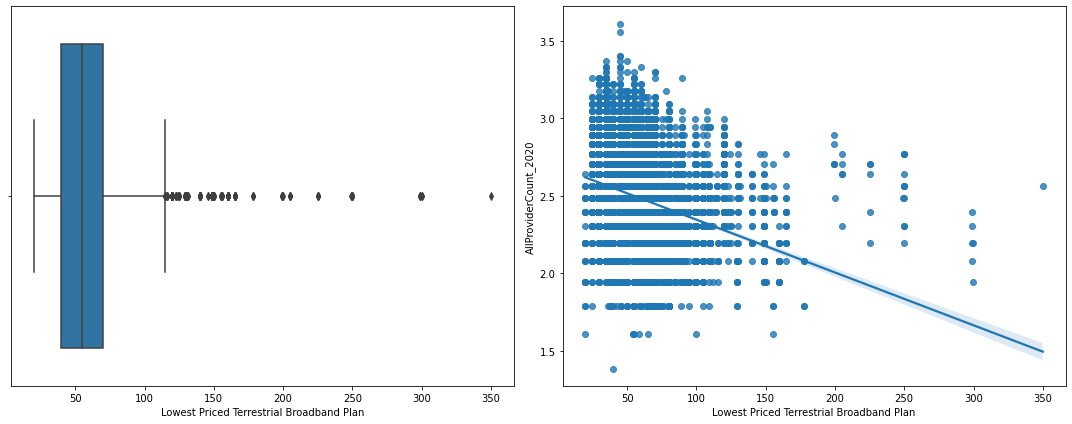

In [53]:
plot_outlier(df_broadband['Lowest Priced Terrestrial Broadband Plan'],df_broadband['AllProviderCount_2020'])

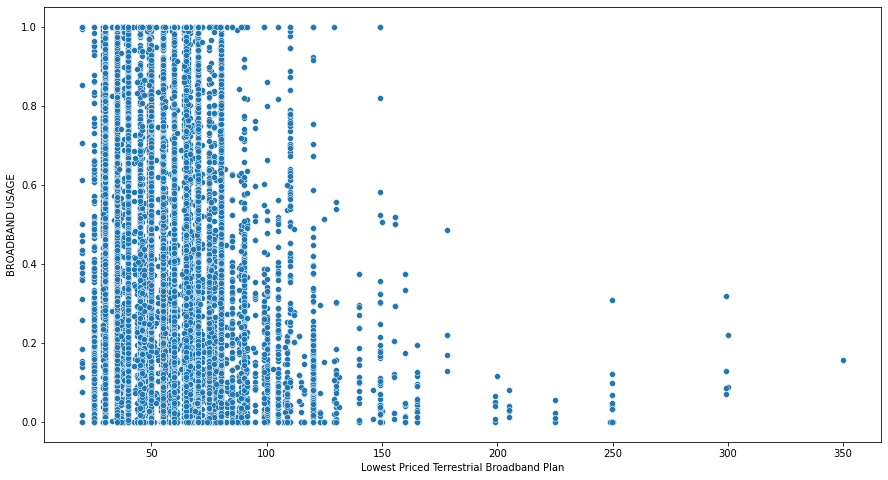

In [63]:
# Let's take a look at the lowest price vs. broad band usage
plt.figure(figsize = (15,8))
sns.scatterplot(data=df_broadband, x="Lowest Priced Terrestrial Broadband Plan", y="BROADBAND USAGE")

In [58]:
# Get a subset of price >250
df_broadband[df_broadband['Lowest Priced Terrestrial Broadband Plan']>250]

,Unnamed: 0,Zip,Population,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps,%Access to Terrestrial Broadband,Lowest Priced Terrestrial Broadband Plan,WiredCount_2015,Fwcount_2015,AllProviderCount_2015,Wired25_3_2015,Wired100_3_2015,All25_3_2015,All100_3.1,Total_Enrolled_Households,ST,COUNTY NAME,COUNTY ID,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
2624,2624,41004,4122.0,3.0,2.0,9.0,3.0,3.0,7.0,3.0,372.0,14.52,28.49,100%,299.00,2.0,1.0,5.0,0.0,0.0,0.0,0.0,133.0,KY,Bracken,21023,0.128,0.010,0.031,-0.001
11192,11192,99827,2602.0,1.0,2.0,8.0,1.0,0.0,3.0,0.0,639.0,5.60,12.46,93%,299.95,1.0,1.0,3.0,0.0,0.0,0.0,0.0,45.0,AK,Haines Borough,2100,0.088,0.010,0.031,-0.001
12313,12313,40036,223.0,0.0,2.0,7.0,0.0,0.0,3.0,1.0,12.0,28.60,77.94,0%,299.00,1.0,0.0,3.0,0.0,0.0,0.0,0.0,8.0,KY,Henry,21103,0.070,0.110,0.406,0.031
25045,25045,41064,2073.0,3.0,3.0,10.0,2.0,2.0,6.0,2.0,237.0,4.35,8.84,100%,299.00,1.0,2.0,5.0,0.0,0.0,0.0,0.0,73.0,KY,Robertson,21201,0.087,0.016,0.048,0.000
25487,25487,95690,2533.0,1.0,5.0,12.0,0.0,0.0,3.0,1.0,160.0,8.66,38.28,80%,349.95,1.0,4.0,6.0,1.0,0.0,2.0,0.0,32.0,CA,Sacramento,6067,0.157,0.016,0.048,0.000
26900,26900,22652,1399.0,1.0,2.0,8.0,0.0,0.0,4.0,1.0,0.0,0.00,0.00,34%,299.00,2.0,0.0,4.0,0.0,0.0,0.0,0.0,13.0,VA,Shenandoah,51171,0.318,0.023,0.072,0.000
27076,27076,99840,968.0,1.0,1.0,6.0,1.0,0.0,3.0,0.0,176.0,4.95,13.78,0.98,299.95,1.0,1.0,3.0,0.0,0.0,0.0,0.0,12.0,AK,Skagway Municipality,2230,0.219,0.027,0.086,0.001


These rows with lowest with price greater than 350 doesn't seem to be coded wrong. I'll keep these rows for now. 